In [22]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import optuna
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score



# Cell 2: Carregamento dos dados
data = pd.read_csv('/home/cid34senhas/Desktop/DAATP/Entrega/6_data_extratrees_norm.csv') 

# Separação das features e do target
X = data.drop('Transition', axis=1)
y = data['Transition']




0      0
1      0
2      1
3      4
4      0
      ..
300    0
301    0
302    2
303    3
304    0
Name: Transition, Length: 305, dtype: int64


In [15]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 150)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    max_depth = trial.suggest_int('max_depth', 50, 70)
    min_samples_split = trial.suggest_int('min_samples_split', 10, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 6)
    bootstrap = trial.suggest_categorical('bootstrap', [False, True])
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])



    model1 = ExtraTreesClassifier(
        n_estimators=n_estimators,
        max_features=max_features,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=34,
        bootstrap=bootstrap,
        class_weight=class_weight,
        criterion=criterion
    )

    scores_5 = cross_val_score(model1, X, y, cv=5, scoring='f1_macro')
    accuracy_5 = scores_5.mean()

    return accuracy_5


In [16]:
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=100)
print(f"Melhor F1_Score: {study.best_value}")
print(f"Melhores hiperparâmetros: {study.best_params}")

[I 2025-01-19 19:12:34,583] A new study created in memory with name: no-name-71bce5af-77d7-4a6a-8f60-b5ba6866a32a
[I 2025-01-19 19:12:35,417] Trial 0 finished with value: 0.31593780535391225 and parameters: {'n_estimators': 132, 'max_features': 'sqrt', 'max_depth': 59, 'min_samples_split': 17, 'min_samples_leaf': 2, 'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'log_loss'}. Best is trial 0 with value: 0.31593780535391225.
[I 2025-01-19 19:12:36,264] Trial 1 finished with value: 0.3213795679145318 and parameters: {'n_estimators': 133, 'max_features': 'sqrt', 'max_depth': 59, 'min_samples_split': 19, 'min_samples_leaf': 2, 'bootstrap': True, 'class_weight': None, 'criterion': 'gini'}. Best is trial 1 with value: 0.3213795679145318.
[I 2025-01-19 19:12:36,989] Trial 2 finished with value: 0.3363357998679706 and parameters: {'n_estimators': 131, 'max_features': 'sqrt', 'max_depth': 57, 'min_samples_split': 10, 'min_samples_leaf': 5, 'bootstrap': False, 'class_weight': 'balan

Melhor F1_Score: 0.34686147559386765
Melhores hiperparâmetros: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 50, 'min_samples_split': 11, 'min_samples_leaf': 5, 'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini'}


### Tentativa 1 : 

Melhor F1_Score: 0.34753588667594454

Melhores hiperparâmetros: {'n_estimators': 139, 'max_features': 'sqrt', 'max_depth': 49, 'min_samples_split': 8, 'min_samples_leaf': 3, 'bootstrap': False, 'class_weight': 'balanced'}

### Tentativa 2 : 

Melhor F1_Score: 0.36760080952882745

Melhores hiperparâmetros: {'n_estimators': 111, 'max_features': 'sqrt', 'max_depth': 54, 'min_samples_split': 14, 'min_samples_leaf': 4, 'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini'}

### Tentativa 3 : 
Melhor F1_Score: 0.34686147559386765

Melhores hiperparâmetros: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 50, 'min_samples_split': 11, 'min_samples_leaf': 5, 'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini'}

In [17]:
def plot_confusion_matrix_with_labels(confusion_matrix, label_mapping):
    # Criar um mapeamento inverso
    reverse_label_mapping = {v: k for k, v in label_mapping.items()}
    
    # Aplicar o mapeamento inverso na matriz de confusão
    cm_with_labels = np.zeros_like(confusion_matrix, dtype=object)
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            cm_with_labels[i, j] = f"{reverse_label_mapping[i]} (Pred: {reverse_label_mapping[j]})"

    # Criar um DataFrame para facilitar a visualização
    df_cm = pd.DataFrame(confusion_matrix, index=reverse_label_mapping.values(), columns=reverse_label_mapping.values())
    
    # Plotar a matriz de confusão
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix with Labels')
    plt.show()
label_mapping = {
    'CN-CN': 0,
    'AD-AD': 1,
    'MCI-AD': 2,
    'MCI-MCI': 3,
    'CN-MCI' : 4
}





              precision    recall  f1-score   support

           0       0.59      0.92      0.72        24
           1       0.53      0.67      0.59        15
           2       0.15      0.12      0.13        17
           3       0.25      0.11      0.15        18
           4       0.00      0.00      0.00         3

    accuracy                           0.47        77
   macro avg       0.30      0.36      0.32        77
weighted avg       0.38      0.47      0.40        77



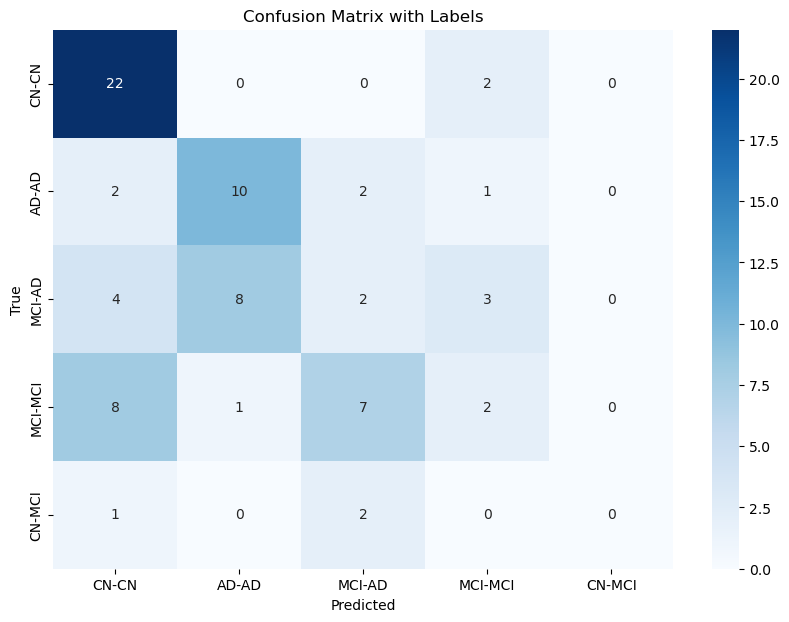

Cross Validation Score: [0.39933952 0.31090838 0.43019421 0.4005176  0.29704433]
Cross Validation Score Média: 0.36760080952882745
Cross Validation Score STD: 0.05329360632032132


In [24]:
extra_trees_model = ExtraTreesClassifier( n_estimators=111, max_features='sqrt',max_depth=54, min_samples_split=14, min_samples_leaf=4 , bootstrap=False, class_weight='balanced',criterion='gini' , random_state=34)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=34, stratify=y)

extra_trees_model.fit(X_train, y_train)
et_pred = extra_trees_model.predict(X_test)
print(classification_report(y_test,et_pred,zero_division=0))
cm = confusion_matrix(y_test,et_pred)
plot_confusion_matrix_with_labels(cm, label_mapping)


et_score = cross_val_score(extra_trees_model, X, y, cv=5,scoring='f1_macro')

print(f"Cross Validation Score: {et_score}")
print(f"Cross Validation Score Média: {et_score.mean()}")
print(f"Cross Validation Score STD: {et_score.std()}")

## Gerar CSV para submissão

In [19]:
def remove_highly_correlated_features(data, target, threshold):
    """
    Remove features altamente correlacionadas, mantendo a que tem maior correlação com o target.

    Args:
        data (pd.DataFrame): DataFrame contendo as features.
        target (pd.Series): Coluna com os valores do target.
        threshold (float): Valor de correlação acima do qual consideramos features altamente correlacionadas.

    Returns:
        pd.DataFrame: DataFrame com as colunas altamente correlacionadas removidas.
        set: Conjunto das colunas removidas.
    """
    # Compute the correlation matrix
    corr_matrix = data.corr().abs()
    
    # Compute correlation of each feature with the target
    target_corr = data.corrwith(data['Transition']).abs()
    
    # Identify columns to remove based on correlation
    to_drop = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] >= threshold:
                col_i = corr_matrix.columns[i]
                col_j = corr_matrix.columns[j]
                
                # Remove the column with lower correlation with the target
                if target_corr[col_i] < target_corr[col_j]:
                    to_drop.add(col_i)
                else:
                    to_drop.add(col_j)

    # Drop the identified columns
    data_final = data.drop(columns=to_drop)

    return data_final, to_drop


def remove_low_variance_features(data, threshold):
    """
    Remove columns with a standard deviation below the given threshold.

    Parameters:
        data (pd.DataFrame): The input DataFrame.
        threshold (float): The minimum standard deviation a column must have to be retained.

    Returns:
        tuple: A tuple containing:
            - pd.DataFrame: A DataFrame with low-variance columns removed.
            - list: A list of columns that were removed.
    """
    # Calculate the standard deviation for each column
    std_dev = data.std()

    # Identify columns to keep (standard deviation above threshold)
    retained_columns = std_dev[std_dev > threshold].index

    # Identify columns to remove
    removed_columns = std_dev[std_dev <= threshold].index

    # Create a new DataFrame with only the retained columns
    data_reduced = data[retained_columns]

    return data_reduced, removed_columns

from sklearn.base import ClassifierMixin

def generate_predictions_csv(model: ClassifierMixin, test_data: pd.DataFrame):
    """
    Gera um arquivo CSV com as previsões do modelo fornecido e o conjunto de teste.

    Parameters:
    - model: Classificador treinado (ex: RandomForestClassifier, DecisionTreeClassifier).
    - test_data: DataFrame de teste para o qual as previsões serão feitas.
    - output_filename: Nome do arquivo de saída para salvar as previsões (padrão é 'predictions.csv').
    """
    # Realizar as previsões
    predictions = model.predict(test_data)
    
    # Mapeamento inverso para converter de números para labels
    label_mapping = {
        0: 'CN-CN',
        1: 'AD-AD',
        2: 'MCI-AD',
        3: 'MCI-MCI',
        4:  'CN-MCI'

    }
    
    # Converter as previsões numéricas para as labels correspondentes
    predictions_labels = [label_mapping[pred] for pred in predictions]
    
    # Criar DataFrame com as previsões
    predictions_df = pd.DataFrame(predictions_labels, columns=['Result'])
    predictions_df.index = range(1, len(predictions_df) + 1)
    predictions_df.index.name = 'RowId'
    
    # Exibir a contagem de cada label prevista
    counts = predictions_df['Result'].value_counts()
    print("Contagem de previsões para cada label:")
    print(counts)
    
    # Extrair o nome do modelo para o arquivo de saída
    model_name = str(model)  
    if '(' in model_name:
        output_filename = model_name.split('(')[0] + ".csv"
    else:
        output_filename = model_name + ".csv"
    
    # Salvar o DataFrame em um arquivo CSV
    predictions_df.to_csv(output_filename, index=True)
    print(f"Resultados salvos no arquivo {output_filename}")




In [ ]:
from sklearn.preprocessing import MinMaxScaler


data_test = pd.read_csv('/home/cid34senhas/Desktop/DAATP/Entrega/1_DF_Test_1_After_Pre_Processamento.csv') 
data_original= pd.read_csv('/home/cid34senhas/Desktop/DAATP/Entrega/1_DF_CN-MCI_1_After_Pre_Processamento.csv') 
X_cleaned, to_drop = remove_highly_correlated_features(data_original, 'Transition', 0.93)


data_final = data_test.drop(columns=to_drop,axis=1)


scaler = MinMaxScaler()

data_test_final = scaler.fit_transform(data_final)

print("Shape Do data_set Final de treino do Extra Trees ")
print(data.shape)
print("\n")
print("Shape Do data_set Final de test do Extra Trees ")
print(data_test_final.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=34, stratify=y)

extra_trees_model.fit(X_train,y_train)
generate_predictions_csv(extra_trees_model,data_test_final)


Shape Do data_set Final de treino do Extra Trees 
(305, 812)


Shape Do data_set Final de test do Extra Trees 
(100, 811)
Contagem de previsões para cada label:
Result
CN-CN      42
AD-AD      38
MCI-AD     11
MCI-MCI     9
Name: count, dtype: int64
Resultados salvos no arquivo ExtraTreesClassifier.csv


/home/cid34senhas/miniconda3/envs/DAA123/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


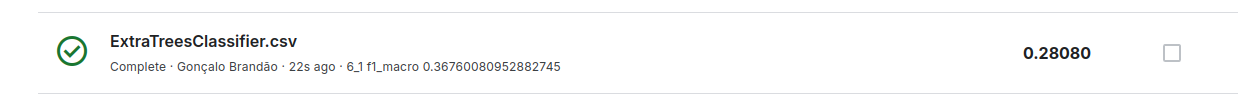

O resultado até ao momento mais parecido na publica aos resultados obtidos localmente. É de notar que o modelo nao prever nenhum CN-MCI o projedica bastante